In [87]:
import pandas as pd

# Thông tin dữ liệu

In [88]:
item_1=pd.read_csv('124221.csv')
item_2=pd.read_csv('124212.csv')

In [89]:
item_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    23 non-null     object 
 1   KTMT    23 non-null     float64
 2   PCB     23 non-null     float64
 3   CTDL    23 non-null     float64
 4   CSKTLT  23 non-null     float64
 5   HDH     23 non-null     float64
 6   CSDL    23 non-null     float64
 7   HDT     23 non-null     float64
 8   WF      23 non-null     float64
 9   MMT     23 non-null     float64
 10  CNPM    23 non-null     float64
 11  DA1     23 non-null     float64
 12  HQT     23 non-null     float64
 13  PNC     23 non-null     float64
 14  TRR     23 non-null     float64
dtypes: float64(14), object(1)
memory usage: 2.8+ KB


In [90]:
item_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23 entries, 0 to 22
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MaSV    23 non-null     object 
 1   KTMT    23 non-null     float64
 2   PCB     23 non-null     float64
 3   CTDL    23 non-null     float64
 4   CSKTLT  23 non-null     float64
 5   HDH     23 non-null     float64
 6   CSDL    23 non-null     float64
 7   HDT     23 non-null     float64
 8   WF      23 non-null     float64
 9   MMT     23 non-null     float64
 10  CNPM    23 non-null     float64
 11  DA1     23 non-null     float64
 12  HQT     23 non-null     float64
 13  PNC     23 non-null     float64
 14  TRR     23 non-null     float64
dtypes: float64(14), object(1)
memory usage: 2.8+ KB


In [91]:
item_1.columns

Index(['MaSV', 'KTMT', 'PCB', 'CTDL', 'CSKTLT', 'HDH', 'CSDL', 'HDT', 'WF',
       'MMT', 'CNPM', 'DA1', 'HQT', 'PNC', 'TRR'],
      dtype='object')

# Câu a:
Xây dựng dataset D cho việc gợi ý các luật kết hợp từ kết quả học tập của các sinh
viên có điểm giỏi trở lên.

In [92]:
# Thư viện luật kết hợp
from mlxtend.frequent_patterns import fpgrowth, association_rules

In [93]:
def get_subjects(row):
    subjects=[]
    if row['KTMT']>=8.0:
        subjects.append('KTMT')
    if row['PCB']>=8.0:
        subjects.append('PCB')
    if row['CTDL']>=8.0:
        subjects.append('CTDL')
    if row['CSKTLT']>=8.0:
        subjects.append('CSKTLT')
    if row['HDH']>=8.0:
        subjects.append('HDH')
    if row['CSDL']>=8.0:
        subjects.append('CSDL')
    if row['HDT']>=8.0:
        subjects.append('HDT')
    if row['WF']>=8.0:
        subjects.append('WF')
    if row['MMT']>=8.0:
        subjects.append('MMT')
    if row['CNPM']>=8.0:
        subjects.append('CNPM')
    if row['DA1']>=8.0:
        subjects.append('DA1')
    if row['HQT']>=8.0:
        subjects.append('HQT')
    if row['PNC']>=8.0:
        subjects.append('PNC')
    if row['TRR']>=8.0:
        subjects.append('TRR')
    return subjects

In [94]:

item_1['good_subject']=item_1.apply(get_subjects,axis=1)
item_2['good_subject']=item_2.apply(get_subjects,axis=1)
df=pd.concat([item_1, item_2], ignore_index=True)

In [95]:
df['good_subject'].head(5)

0                           [PCB, CTDL, HDT, DA1, PNC]
1    [KTMT, PCB, CTDL, CSKTLT, HDH, HDT, CNPM, DA1,...
2                                          [KTMT, PCB]
3                                           [PCB, PNC]
4    [KTMT, PCB, CTDL, CSKTLT, CSDL, HDT, WF, MMT, ...
Name: good_subject, dtype: object

In [96]:
df.tail(5)

,MaSV,KTMT,PCB,CTDL,CSKTLT,HDH,CSDL,HDT,WF,MMT,CNPM,DA1,HQT,PNC,TRR,good_subject
41,SV19,6.0,7.2,6.4,6.7,5.8,5.3,5.2,7.3,5.7,7.0,6.4,5.1,5.5,5.9,[]
42,SV20,7.8,8.5,7.0,7.4,7.3,5.9,7.3,7.5,6.1,8.3,8.0,7.9,8.3,7.8,"[PCB, CNPM, DA1, PNC]"
43,SV21,8.0,8.2,8.0,7.4,7.5,7.1,8.0,8.3,8.0,8.8,8.5,8.8,9.5,7.5,"[KTMT, PCB, CTDL, HDT, WF, MMT, CNPM, DA1, HQT..."
44,SV22,8.0,8.5,7.9,7.9,6.5,6.3,7.3,6.0,7.7,6.8,7.8,6.7,8.0,6.0,"[KTMT, PCB, PNC]"
45,SV23,4.5,6.8,5.9,7.2,5.3,5.7,6.9,2.5,6.9,0.0,7.3,5.0,7.8,5.3,[]


# Câu b:
Lập trình sử dụng thuật toán FPGrowth để tìm ra Top 5 luật kết hợp phổ biến để gợi ý
đăng ký môn học cho sinh viên, giả sử minsup = 5 và minconf = 0.8.

In [97]:
item_1.columns

Index(['MaSV', 'KTMT', 'PCB', 'CTDL', 'CSKTLT', 'HDH', 'CSDL', 'HDT', 'WF',
       'MMT', 'CNPM', 'DA1', 'HQT', 'PNC', 'TRR', 'good_subject'],
      dtype='object')

In [98]:
# Tạo dataset D ở dạng one-hot encoding
all_subjects=[ 'KTMT', 'PCB', 'CTDL', 'CSKTLT', 'HDH', 'CSDL', 'HDT', 'WF',
       'MMT', 'CNPM', 'DA1', 'HQT', 'PNC', 'TRR']
one_hot=pd.DataFrame(0,index=df.index,columns=all_subjects)
for idx,subjects in  enumerate(df['good_subject']):
    for subject in subjects:
        one_hot.loc[idx,subject]=1 

In [99]:
one_hot.head(5)

,KTMT,PCB,CTDL,CSKTLT,HDH,CSDL,HDT,WF,MMT,CNPM,DA1,HQT,PNC,TRR
0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1,1,1,1,1,1,0,1,0,0,1,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [100]:
# Sử dụng thuật toán FPGrowth để tìm các tập hợp phổ biến
minsup = 5 / 100  # Chuyển đổi sang tỷ lệ
frequent_itemsets = fpgrowth(one_hot, min_support=minsup, use_colnames=True)

d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [101]:
# Tìm các luật kết hợp phổ biến
minconf = 0.8
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=minconf, num_itemsets=None)

In [102]:
# Lấy top 5 luật phổ biến nhất
top_5_rules = rules.sort_values(by="confidence", ascending=False).head(5)

In [103]:
# Hiển thị kết quả
print("Dataset D:")
print(one_hot.head(5))

Dataset D:
   KTMT  PCB  CTDL  CSKTLT  HDH  CSDL  HDT  WF  MMT  CNPM  DA1  HQT  PNC  TRR
0     0    1     1       0    0     0    1   0    0     0    1    0    1    0
1     1    1     1       1    1     0    1   0    0     1    1    0    1    0
2     1    1     0       0    0     0    0   0    0     0    0    0    0    0
3     0    1     0       0    0     0    0   0    0     0    0    0    1    0
4     1    1     1       1    0     1    1   1    1     1    1    1    1    0


In [104]:
print("\nTop 5 luật kết hợp phổ biến:")
print(top_5_rules)


Top 5 luật kết hợp phổ biến:
                   antecedents        consequents  antecedent support  \
10705          (DA1, WF, CNPM)    (PCB, HQT, PNC)            0.065217   
14280     (WF, HQT, CNPM, PNC)  (CTDL, HDT, KTMT)            0.065217   
14278   (CTDL, HQT, CNPM, HDT)    (PNC, WF, KTMT)            0.065217   
14277   (CTDL, HQT, CNPM, PNC)    (WF, HDT, KTMT)            0.065217   
14276  (CTDL, HQT, CNPM, KTMT)     (WF, HDT, PNC)            0.065217   

       consequent support   support  confidence       lift  representativity  \
10705            0.152174  0.065217         1.0   6.571429               1.0   
14280            0.152174  0.065217         1.0   6.571429               1.0   
14278            0.086957  0.065217         1.0  11.500000               1.0   
14277            0.086957  0.065217         1.0  11.500000               1.0   
14276            0.086957  0.065217         1.0  11.500000               1.0   

       leverage  conviction  zhangs_metric   jacca

# Câu c:    
Dự đoán: nếu một hoặc nhiều môn A,B,... được điểm cao thì các môn A',B',... cũng được điểm cao

In [105]:
one_hot.head()

,KTMT,PCB,CTDL,CSKTLT,HDH,CSDL,HDT,WF,MMT,CNPM,DA1,HQT,PNC,TRR
0,0,1,1,0,0,0,1,0,0,0,1,0,1,0
1,1,1,1,1,1,0,1,0,0,1,1,0,1,0
2,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,1,1,1,1,0,1,1,1,1,1,1,1,1,0


In [106]:
frequent_itemsets = fpgrowth(one_hot, min_support=0.3, use_colnames=True)

d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [107]:
print("Frequent Itemsets:")
print(frequent_itemsets)

Frequent Itemsets:
    support     itemsets
0  0.586957        (PNC)
1  0.565217        (PCB)
2  0.369565        (DA1)
3  0.326087       (CTDL)
4  0.434783       (KTMT)
5  0.391304       (CNPM)
6  0.434783   (PCB, PNC)
7  0.304348  (CTDL, PNC)
8  0.326087  (PCB, KTMT)
9  0.326087  (PNC, KTMT)


In [113]:
# from sklearn.preprocessing import LabelEncoder
# E=LabelEncoder()
# frequent_itemsets['itemsets']=E.fit_transform(frequent_itemsets['itemsets'])
from mlxtend.frequent_patterns import association_rules

In [ ]:
frequent_itemsets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   support   10 non-null     float64
 1   itemsets  10 non-null     object 
dtypes: float64(1), object(1)
memory usage: 292.0+ bytes


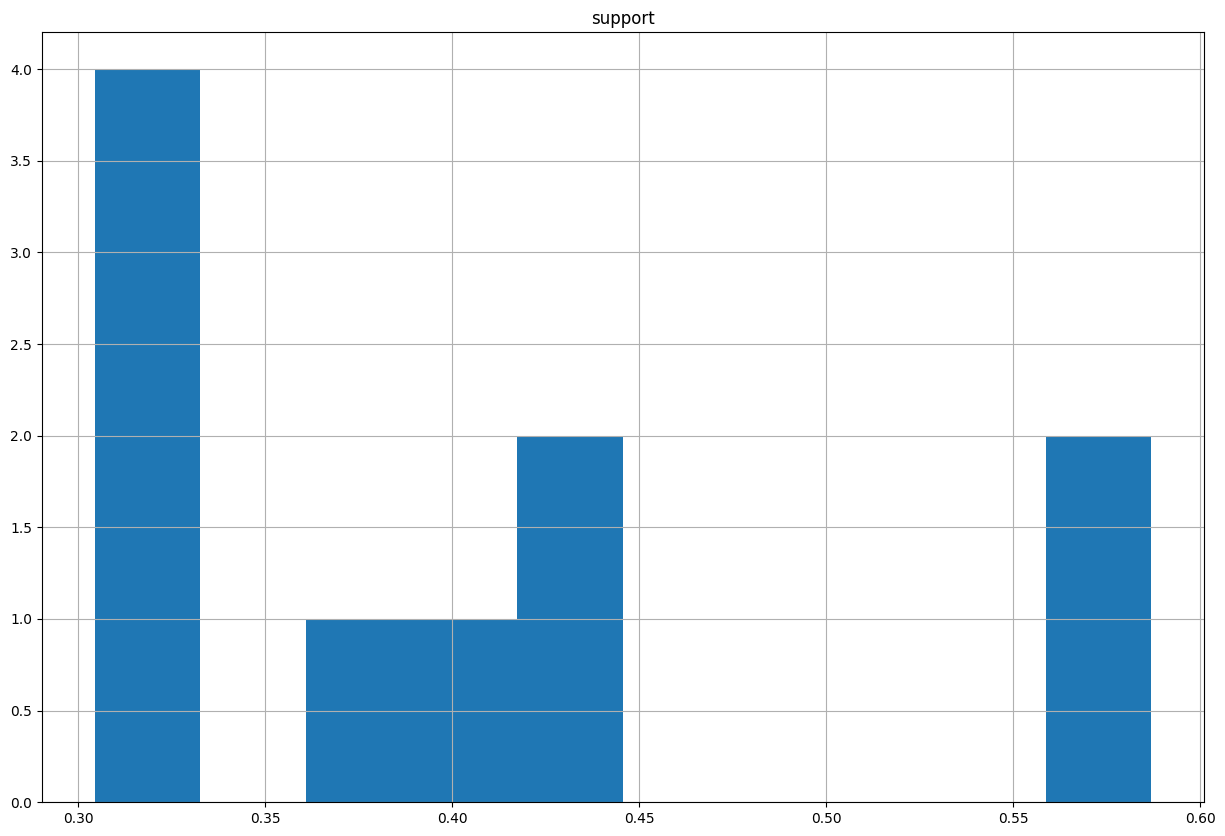

In [110]:
import matplotlib.pyplot as plt
frequent_itemsets.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

In [111]:
frequent_itemsets.nunique()

support      7
itemsets    10
dtype: int64

Tạo các quy tắc kết hợp từ các mẫu kết hợp phổ biến     
Chọn các quy tắc với độ tin cậy (confidence) >= 0.7

In [121]:
# Chạy hàm association_rules với tham số metric và min_threshold, số lượng num_itemsets=10
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7, num_itemsets=4)

# Hiển thị kết quả
print(rules)

  antecedents consequents  antecedent support  consequent support   support  \
0       (PCB)       (PNC)            0.565217            0.586957  0.434783   
1       (PNC)       (PCB)            0.586957            0.565217  0.434783   
2      (CTDL)       (PNC)            0.326087            0.586957  0.304348   
3      (KTMT)       (PCB)            0.434783            0.565217  0.326087   
4      (KTMT)       (PNC)            0.434783            0.586957  0.326087   

   confidence      lift  representativity  leverage  conviction  \
0    0.769231  1.310541               1.0  0.103025    1.789855   
1    0.740741  1.310541               1.0  0.103025    1.677019   
2    0.933333  1.590123               1.0  0.112949    6.195652   
3    0.750000  1.326923               1.0  0.080340    1.739130   
4    0.750000  1.277778               1.0  0.070888    1.652174   

   zhangs_metric   jaccard  certainty  kulczynski  
0       0.545000  0.606061   0.441296    0.754986  
1       0.573684  

* antecedents (Tiền đề):
Tập hợp các môn học (hoặc mục) xuất hiện trong phần tiền đề của quy tắc kết hợp. Ví dụ, (PCB) trong dòng đầu tiên có nghĩa là nếu môn PCB được điểm cao, thì sẽ có một khả năng cao là môn PNC cũng được điểm cao.
* consequents (Hệ quả):
Tập hợp các môn học (hoặc mục) xuất hiện trong phần hệ quả của quy tắc kết hợp. Ví dụ, (PNC) trong dòng đầu tiên có nghĩa là nếu môn PCB được điểm cao, thì môn PNC cũng sẽ được điểm cao.
* antecedent support:
Tần suất (support) của tiền đề, tức là tỷ lệ phần trăm các giao dịch chứa tiền đề trong tập dữ liệu. Ví dụ, 0.565217 cho tiền đề (PCB) có nghĩa là 56.52% các giao dịch chứa môn PCB.
* consequent support:
Tần suất (support) của hệ quả, tức là tỷ lệ phần trăm các giao dịch chứa hệ quả trong tập dữ liệu. Ví dụ, 0.586957 cho hệ quả (PNC) có nghĩa là 58.70% các giao dịch chứa môn PNC.
* support:
Tần suất mà quy tắc kết hợp (antecedent => consequent) xuất hiện trong toàn bộ tập dữ liệu. Ví dụ, 0.434783 có nghĩa là 43.48% các giao dịch chứa cả tiền đề và hệ quả.
* confidence:
Đo lường xác suất (confidence) của việc hệ quả xảy ra khi tiền đề đã xảy ra. Nó cho biết khả năng hệ quả xảy ra khi tiền đề có mặt.
Ví dụ: 0.769231 có nghĩa là khi môn PCB được điểm cao, 76.92% khả năng môn PNC cũng sẽ được điểm cao.
* lift:
Đo lường mức độ phụ thuộc của hai mục. Lift cho biết sự liên quan giữa tiền đề và hệ quả, so với trường hợp mà các mục này hoàn toàn độc lập với nhau.
Một giá trị lift lớn hơn 1 cho thấy tiền đề và hệ quả có mối quan hệ chặt chẽ. Ví dụ: 1.310541 có nghĩa là có sự phụ thuộc dương giữa PCB và PNC.
* representativity:
Đo lường sự đại diện của quy tắc trong tập dữ liệu. Giá trị 1.0 có nghĩa là quy tắc có sự đại diện hoàn hảo đối với tập dữ liệu.
* leverage:
Chỉ số này đo lường sự khác biệt giữa support của quy tắc và giá trị mong đợi nếu các mục trong tiền đề và hệ quả là độc lập. Giá trị leverage cao cho thấy quy tắc có sức ảnh hưởng mạnh mẽ trong tập dữ liệu. Ví dụ: 0.103025 có nghĩa là sự khác biệt giữa support thực tế và mong đợi là 10.3%.
* conviction:
Đây là một chỉ số khác để đo lường mức độ mạnh mẽ của quy tắc. Conviction cao có nghĩa là sự phụ thuộc giữa tiền đề và hệ quả là mạnh. Ví dụ: 1.789855 có nghĩa là quy tắc này có một sự phụ thuộc mạnh mẽ.
* zhangs_metric:
Một chỉ số tương tự như confidence nhưng tính toán trên một nền tảng khác để đánh giá mối quan hệ giữa các mục. Ví dụ: 0.545000 là giá trị của chỉ số này cho quy tắc (PCB => PNC).
* jaccard:
Đo lường sự tương đồng giữa tiền đề và hệ quả. Một giá trị Jaccard cao cho thấy sự tương đồng lớn giữa các mục. Ví dụ: 0.606061 có nghĩa là có một sự tương đồng vừa phải giữa PCB và PNC.
* certainty:
Đo lường sự chắc chắn của quy tắc. Một giá trị cao cho thấy quy tắc là chắc chắn hơn khi tiền đề xuất hiện. Ví dụ: 0.441296 cho thấy quy tắc này có mức độ chắc chắn nhất định.
* kulczynski:
Một chỉ số đo sự tương quan giữa tiền đề và hệ quả, tính toán từ các xác suất của tiền đề và hệ quả. Ví dụ: 0.754986 cho quy tắc (PCB => PNC) cho thấy có sự tương quan mạnh mẽ.